**Ejercicio**

Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses empleando los métodos vistos en la clase. Compare
los resultados con el mejor modelo encontrado en el ejercicio anterior.

Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.

## **1. Carga de paquetes**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose # Import seasonal_decompose
from sklearn.metrics import mean_squared_error # Import mean_squared_error

## **2. Carga de datos**

In [ ]:
data = pd.read_excel("/content/datosEmpleo.xlsx", index_col='mes',parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


In [ ]:
data.tail()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2019-02-01,12.427409,10557.917,1498.272,6264.403
2019-03-01,11.975098,10760.776,1463.919,6116.140
2019-04-01,11.144286,10632.028,1333.469,6395.575
2019-05-01,11.500000,10813.000,1369.000,6199.000
2019-06-01,10.700000,10848.000,1306.000,6247.000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 2001-01-01 to 2019-06-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TD_13ciudades  222 non-null    float64
 1   Ocupados       222 non-null    float64
 2   Desocupados    222 non-null    float64
 3   Inactivos      222 non-null    float64
dtypes: float64(4)
memory usage: 8.7 KB


In [ ]:
data.describe()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
count,222.000000,222.000000,222.000000,222.000000
mean,12.601883,9160.852009,1290.681131,5500.277973
std,2.808235,1295.492800,181.948810,389.227213
min,8.140713,6923.604000,857.491000,4596.805000
25%,10.396078,7971.103000,1152.874750,5308.814750
50%,11.925036,9139.064500,1270.201000,5533.044500
75%,14.087588,10458.510250,1398.899250,5752.608500
max,20.946380,11037.199000,1834.507000,6395.575000


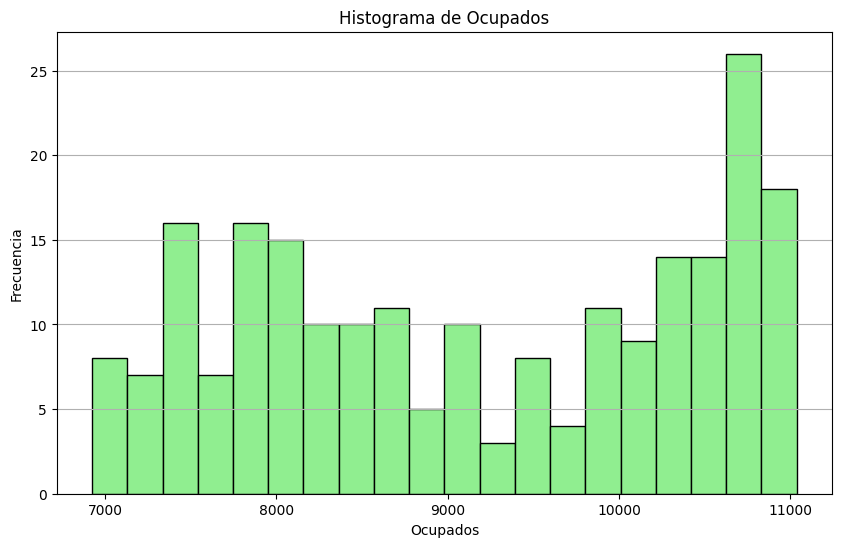

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data["Ocupados"], bins=20, color='lightgreen', edgecolor='black')
plt.title("Histograma de Ocupados")
plt.xlabel("Ocupados")
plt.ylabel("Frecuencia")
plt.grid(axis='y')
plt.show()

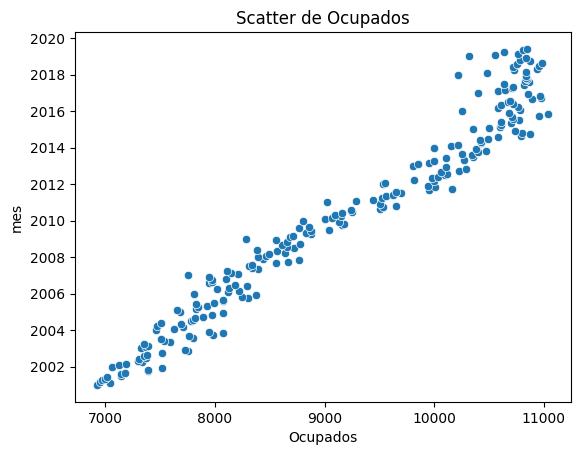

In [ ]:
# Scatter plot: mes vs ocupados
sns.scatterplot(x="Ocupados", y="mes", data=data)
plt.title("Scatter de Ocupados")
plt.show()

(222, 4)


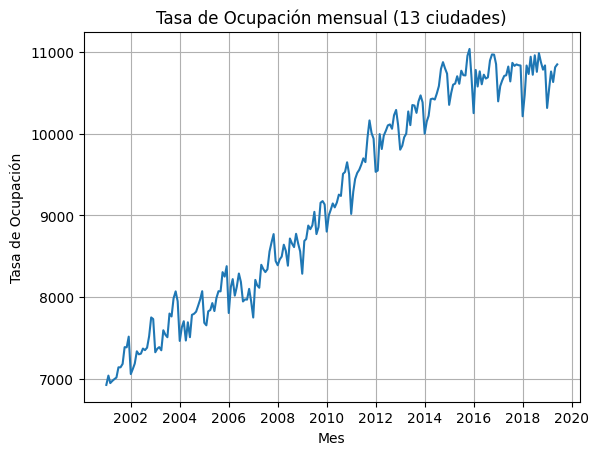

In [ ]:
# imprimiendo el tamano del dataframe
print(data.shape)

# Graficando los datos
plt.title("Tasa de Ocupación mensual (13 ciudades)")
plt.xlabel("Mes")
plt.ylabel("Tasa de Ocupación")
plt.plot(data[["Ocupados"]])
plt.grid()
plt.show()

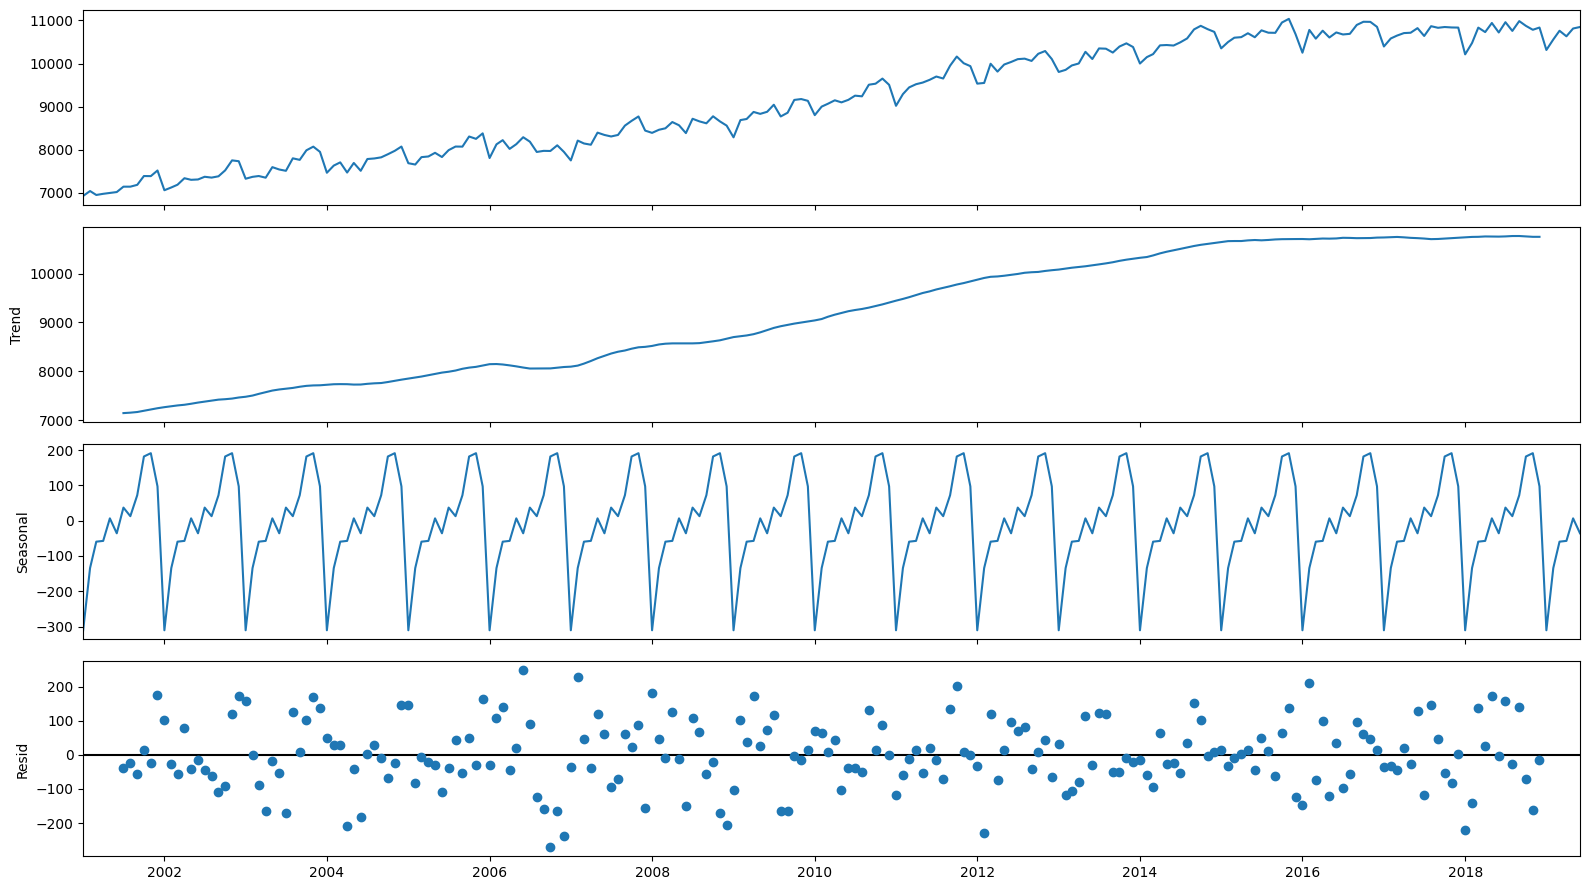

In [ ]:
to_componentes = seasonal_decompose(data[["Ocupados"]],model="additive")
fig = to_componentes.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

## **3. Separación de datos**

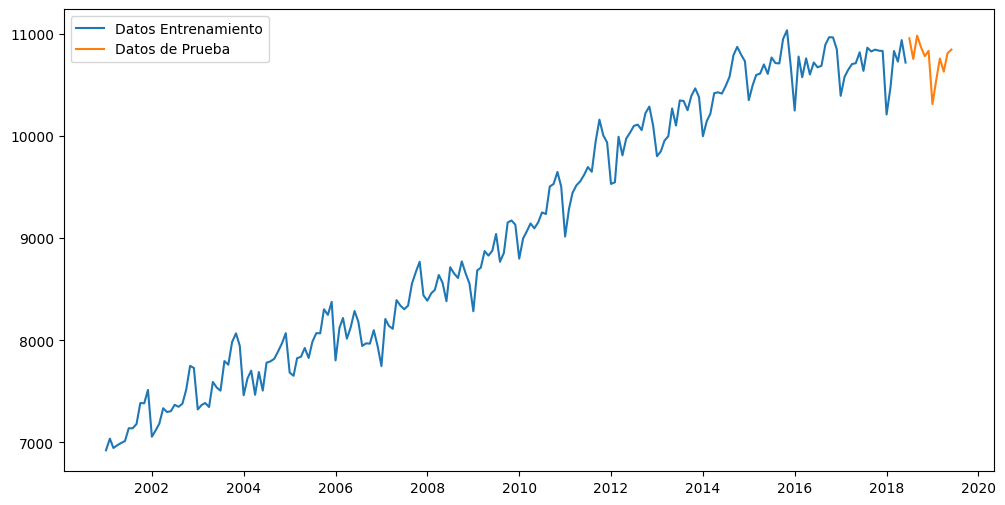

In [ ]:
train_len = 210
train_to = data[["Ocupados"]][:train_len]
test_to = data[["Ocupados"]][train_len:]

fig = plt.figure(figsize=(12, 6))
plt.plot(train_to,label="Datos Entrenamiento")
plt.plot(test_to,label="Datos de Prueba")
plt.legend(loc= "upper left")
plt.show()

In [ ]:
train_to

,Ocupados
mes,
2001-01-01,6923.604
2001-02-01,7037.746
2001-03-01,6945.973
2001-04-01,6973.079
2001-05-01,6994.462
...,...
2018-02-01,10476.311
2018-03-01,10833.980
2018-04-01,10729.977


In [ ]:
test_to

,Ocupados
mes,
2018-07-01,10959.197
2018-08-01,10756.782
2018-09-01,10984.928
2018-10-01,10874.338
2018-11-01,10783.299
2018-12-01,10835.398
2019-01-01,10314.438
2019-02-01,10557.917
2019-03-01,10760.776


### **4. Tendencia Lineal**

In [ ]:
y = train_to["Ocupados"]
x = np.linspace(1,train_to.shape[0],train_to.shape[0]) #numera los registros.
X = sm.add_constant(x)
lin = sm.OLS(y,X)
lin_t = lin.fit()
print(lin_t.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     5362.
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          1.81e-150
Time:                        14:31:01   Log-Likelihood:                -1453.4
No. Observations:                 210   AIC:                             2911.
Df Residuals:                     208   BIC:                             2917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6902.9155     34.123    202.295      0.0

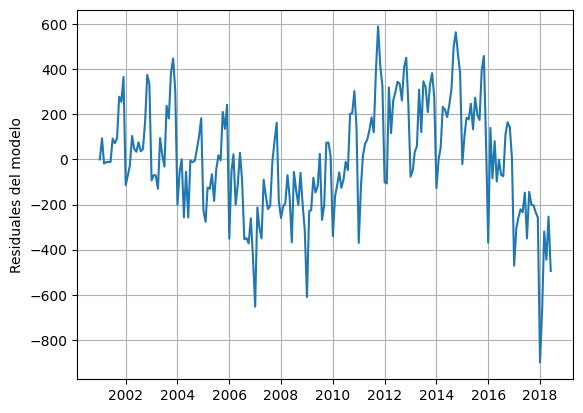

In [ ]:
plt.ylabel("Residuales del modelo")
plt.plot(lin_t.resid)
plt.grid()

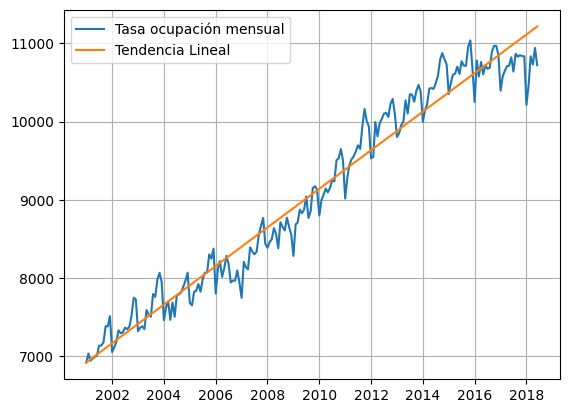

In [ ]:
plt.plot(y,label="Tasa ocupación mensual")
plt.plot(lin_t.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Predicciones para el conjunto de prueba
h = len(test_to) # Use the length of the test set for forecasting horizon
x_for = np.linspace(train_to.shape[0] + 1, train_to.shape[0] + h, h)
X_for = sm.add_constant(x_for)

In [ ]:
dt = lin_t.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds_lin = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds_lin.columns = ['Point_forecast', 'lower_95', 'upper_95'] # Intervalo de confianza del 95%.
print(preds_lin)

    Point_forecast      lower_95      upper_95
0     11236.027809  10745.703248  11726.352370
1     11256.563887  10766.173250  11746.954523
2     11277.099964  10786.642638  11767.557290
3     11297.636042  10807.111411  11788.160672
4     11318.172119  10827.579571  11808.764667
5     11338.708196  10848.047117  11829.369276
6     11359.244274  10868.514050  11849.974498
7     11379.780351  10888.980369  11870.580333
8     11400.316429  10909.446076  11891.186781
9     11420.852506  10929.911171  11911.793841
10    11441.388583  10950.375653  11932.401514
11    11461.924661  10970.839523  11953.009798


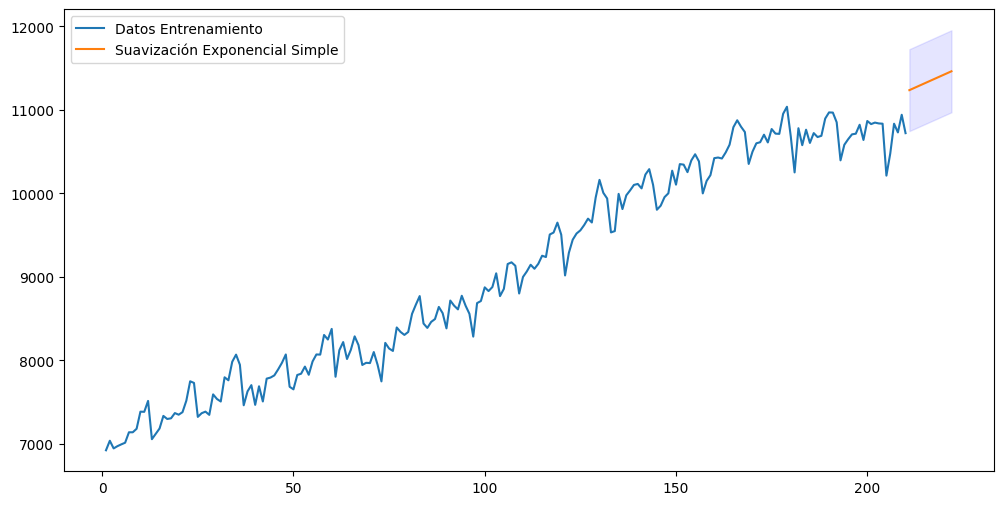

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x,y,label="Datos Entrenamiento")
plt.plot(x_for,preds_lin['Point_forecast'],label="Suavización Exponencial Simple")
plt.fill_between(x_for ,preds_lin['lower_95'], preds_lin['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
rmse_lineal = np.sqrt(mean_squared_error(test_to,preds_lin['Point_forecast']))
print(rmse_lineal)

625.8650417792029


### **5. Tendencia Cuadratica**

In [ ]:
y = train_to ["Ocupados"]
train_to["x"] = np.linspace(1,train_to.shape[0],train_to.shape[0])
train_to["x2"] = x**2
X = sm.add_constant(train_to[["x","x2"]])
pol = sm.OLS(y,X)
pol_2 = pol.fit()
print(pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     2681.
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          1.02e-148
Time:                        14:31:02   Log-Likelihood:                -1452.9
No. Observations:                 210   AIC:                             2912.
Df Residuals:                     207   BIC:                             2922.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6864.6609     51.494    133.311      0.0

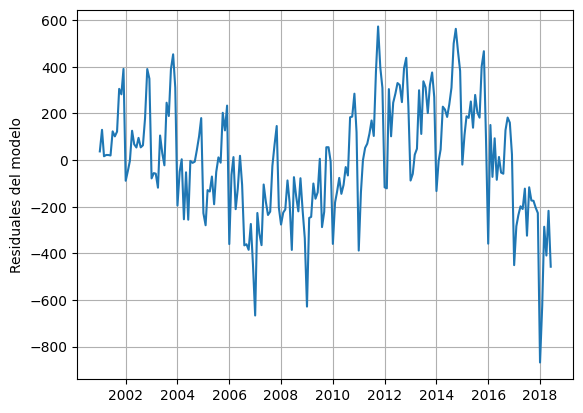

In [ ]:
plt.ylabel("Residuales del modelo")
plt.plot(pol_2.resid)
plt.grid()

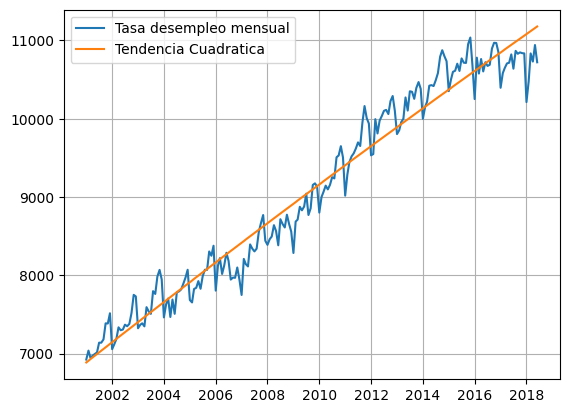

In [ ]:
plt.plot(y,label="Tasa desempleo mensual")
plt.plot(pol_2.fittedvalues,label="Tendencia Cuadratica")
plt.legend()
plt.grid()
plt.show()

In [ ]:
h=12
x_for= np.linspace((train_to.shape[0]+1),(train_to.shape[0]+h),h)
X_for= sm.add_constant(np.stack((x_for, x_for**2), axis=1))

In [ ]:
dt = pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds_cuad = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds_cuad.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds_cuad)

    Point_forecast      lower_95      upper_95
0     11197.773246  10701.557323  11693.989168
1     11217.221516  10720.604512  11713.838520
2     11236.659523  10739.628445  11733.690602
3     11256.087269  10758.628888  11753.545650
4     11275.504751  10777.605603  11773.403900
5     11294.911972  10796.558353  11793.265591
6     11314.308930  10815.486901  11813.130959
7     11333.695626  10834.391009  11833.000244
8     11353.072060  10853.270437  11852.873683
9     11372.438231  10872.124947  11872.751515
10    11391.794140  10890.954300  11892.633980
11    11411.139786  10909.758257  11912.521316


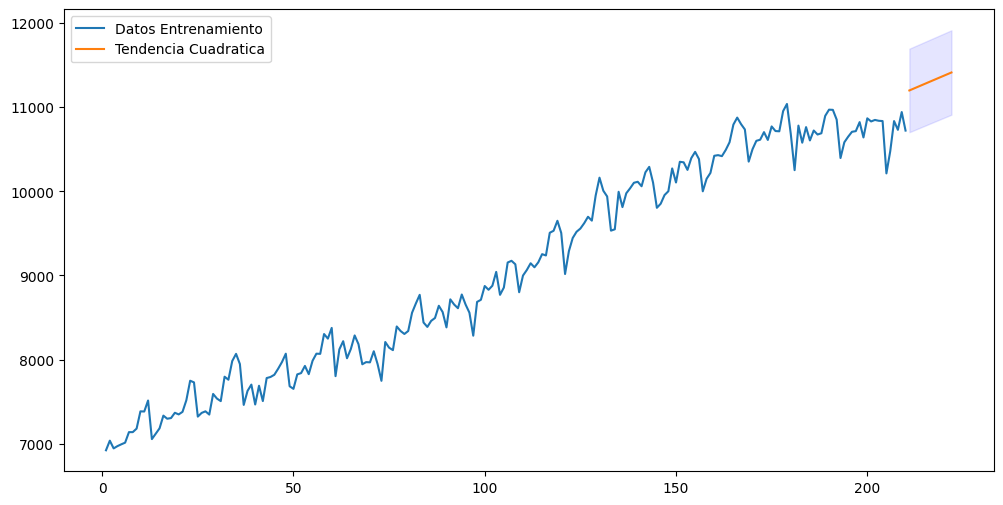

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x,y,label="Datos Entrenamiento")
plt.plot(x_for,preds_cuad['Point_forecast'],label="Tendencia Cuadratica")
plt.fill_between(x_for ,preds_cuad['lower_95'], preds_cuad['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
rmse_cuadratica = np.sqrt(mean_squared_error(test_to,preds_cuad['Point_forecast']))
print(rmse_cuadratica)

583.3930487050638


### **6. Estimación de la Estacionalidad**

In [ ]:
month_dummies = pd.get_dummies(train_to.index.month,drop_first=True).set_index(train_to.index).astype(int) # convertir a int

y = train_to ["Ocupados"]
X = sm.add_constant(month_dummies)
sea = sm.OLS(y,X)
season = sea.fit()
print(season.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.2598
Date:                Thu, 06 Nov 2025   Prob (F-statistic):              0.992
Time:                        14:31:02   Log-Likelihood:                -1797.1
No. Observations:                 210   AIC:                             3618.
Df Residuals:                     198   BIC:                             3658.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8724.5387    305.798     28.530      0.0

In [ ]:
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2001-01-01,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,1,0,0,0,0,0,0,0,0,0,0
2018-03-01,0,1,0,0,0,0,0,0,0,0,0
2018-04-01,0,0,1,0,0,0,0,0,0,0,0


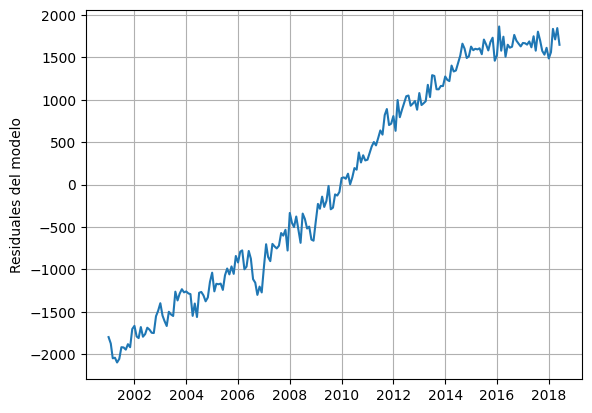

In [ ]:
plt.ylabel("Residuales del modelo")
plt.plot(season.resid)
plt.grid()

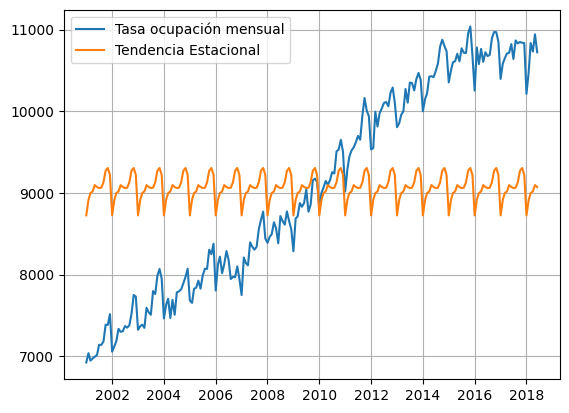

In [ ]:
plt.plot(y,label="Tasa ocupación mensual")
plt.plot(season.fittedvalues,label="Tendencia Estacional")
plt.legend()
plt.grid()
plt.show()

In [ ]:
range_dates = pd.date_range(train_to.index[-1]+ relativedelta(months=12), periods=12,freq='MS')

x_for = pd.get_dummies(range_dates.month,drop_first=True).astype(int) # Convertir a int
X_for= sm.add_constant(x_for)

In [ ]:
dt = season.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds_est = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds_est.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds_est.set_index(range_dates,inplace=True)
print(preds_est)

            Point_forecast     lower_95      upper_95
2019-06-01     9071.789000  6443.204713  11700.373287
2019-07-01     9059.390353  6426.740194  11692.040511
2019-08-01     9062.507118  6429.856959  11695.157276
2019-09-01     9129.933235  6497.283077  11762.583394
2019-10-01     9270.852412  6638.202253  11903.502570
2019-11-01     9304.549471  6671.899312  11937.199629
2019-12-01     9220.622941  6587.972783  11853.273100
2020-01-01     8724.538722  6095.954435  11353.123009
2020-02-01     8914.544389  6285.960102  11543.128676
2020-03-01     8997.218333  6368.634046  11625.802620
2020-04-01     9017.681722  6389.097435  11646.266009
2020-05-01     9095.089000  6466.504713  11723.673287


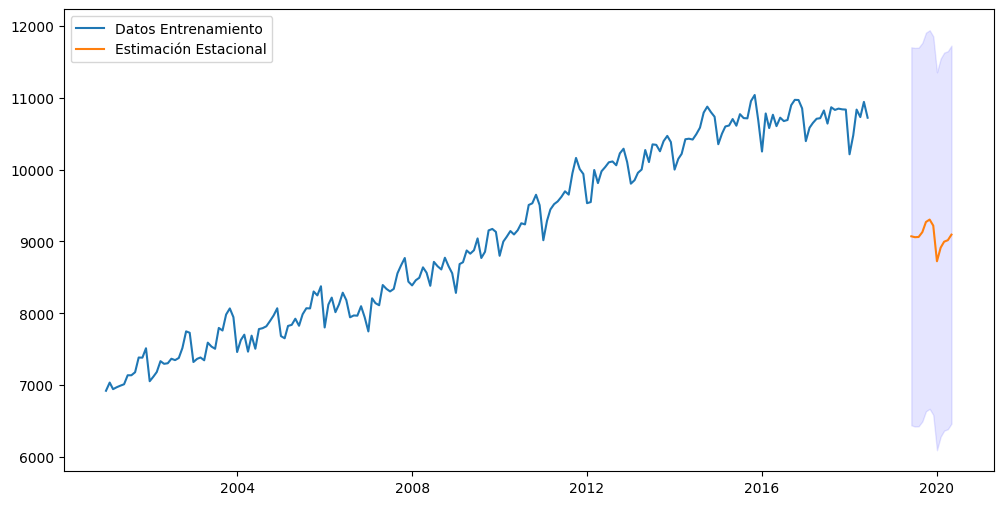

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds_est.index,preds_est['Point_forecast'],label="Estimación Estacional")
plt.fill_between(preds_est.index,preds_est['lower_95'], preds_est['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
rmse_estacionalidad = np.sqrt(mean_squared_error(test_to,preds_est['Point_forecast']))
print(rmse_estacionalidad)

1701.6618124925255


### **7. Tendencia + Estacionalidad**

In [ ]:
y = train_to ["Ocupados"]
train_to["x"] = np.linspace(1,train_to.shape[0],train_to.shape[0])
train_to["x2"] = x**2

month_dummies = pd.get_dummies(train_to.index.month,drop_first=True).set_index(train_to.index).astype(int)
X = sm.add_constant( pd.concat([train_to[["x","x2"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     553.4
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          1.05e-146
Time:                        14:31:03   Log-Likelihood:                -1417.5
No. Observations:                 210   AIC:                             2863.
Df Residuals:                     196   BIC:                             2910.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6589.4780     65.076    101.259      0.0

In [ ]:
X

,const,x,x2,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,,,,
2001-01-01,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,1.0,2.0,4.0,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,1.0,3.0,9.0,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,1.0,4.0,16.0,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,1.0,5.0,25.0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,1.0,206.0,42436.0,1,0,0,0,0,0,0,0,0,0,0
2018-03-01,1.0,207.0,42849.0,0,1,0,0,0,0,0,0,0,0,0
2018-04-01,1.0,208.0,43264.0,0,0,1,0,0,0,0,0,0,0,0


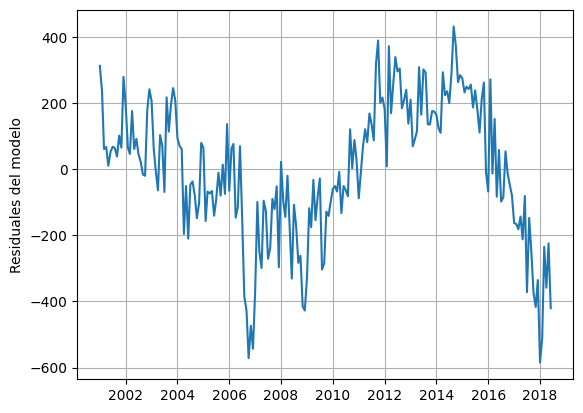

In [ ]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

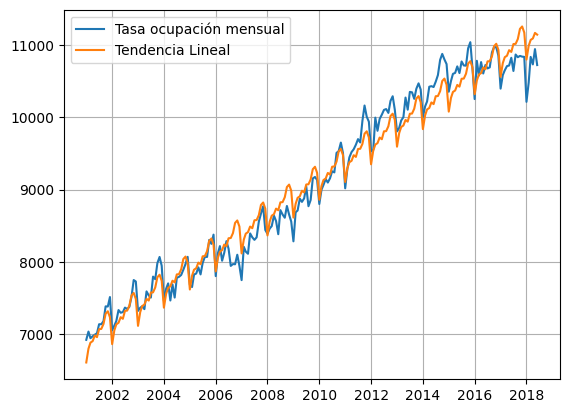

In [ ]:
plt.plot(y,label="Tasa ocupación mensual")
plt.plot(season_pol_2.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [ ]:
h=12
x_for= np.linspace((train_to.shape[0]+1),(train_to.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2),axis=1),columns=["x","x2"] )

range_dates = pd.date_range(train_to.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True).astype(int) # Convert to int

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1))
X_for

,const,x,x2,2,3,4,5,6,7,8,9,10,11,12
0,1.0,211.0,44521.0,0,0,0,0,0,1,0,0,0,0,0
1,1.0,212.0,44944.0,0,0,0,0,0,0,1,0,0,0,0
2,1.0,213.0,45369.0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,214.0,45796.0,0,0,0,0,0,0,0,0,1,0,0
4,1.0,215.0,46225.0,0,0,0,0,0,0,0,0,0,1,0
5,1.0,216.0,46656.0,0,0,0,0,0,0,0,0,0,0,1
6,1.0,217.0,47089.0,0,0,0,0,0,0,0,0,0,0,0
7,1.0,218.0,47524.0,1,0,0,0,0,0,0,0,0,0,0
8,1.0,219.0,47961.0,0,1,0,0,0,0,0,0,0,0,0
9,1.0,220.0,48400.0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds_tendes = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds_tendes.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds_tendes.set_index(range_dates,inplace=True)
print(preds_tendes)

            Point_forecast      lower_95      upper_95
2018-07-01    11250.009378  10807.598658  11692.420098
2018-08-01    11252.445860  10809.736253  11695.155468
2018-09-01    11319.191696  10876.175109  11762.208283
2018-10-01    11459.430590  11016.098948  11902.762232
2018-11-01    11492.447367  11048.792612  11936.102122
2018-12-01    11407.840555  10963.854646  11851.826465
2019-01-01    11035.422653  10592.049647  11478.795659
2019-02-01    11224.710244  10780.986501  11668.433987
2019-03-01    11306.666113  10862.582690  11750.749535
2019-04-01    11326.411426  10881.959404  11770.863448
2019-05-01    11403.100628  10958.271109  11847.930148
2019-06-01    11379.082553  10933.866661  11824.298445


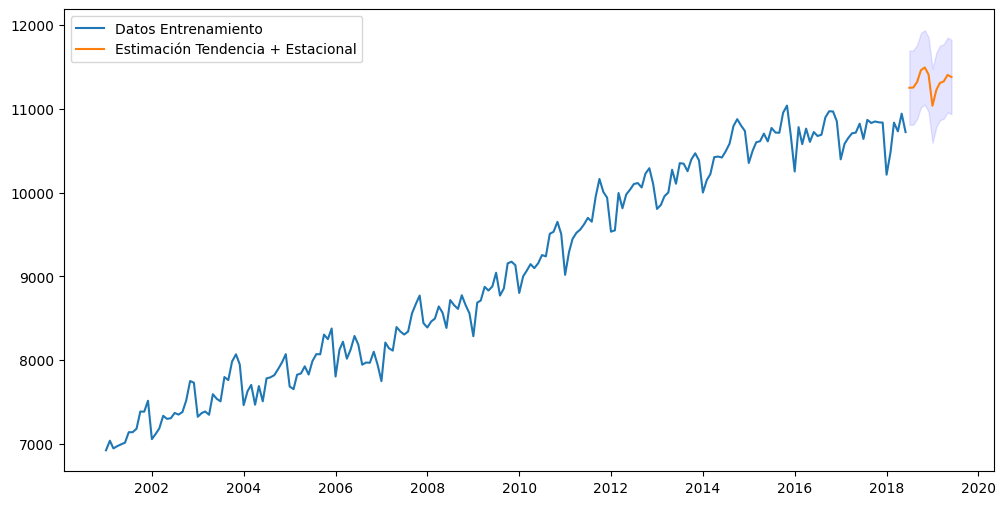

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds_tendes.index,preds_tendes['Point_forecast'],label="Estimación Tendencia + Estacional")
plt.fill_between(preds_tendes.index,preds_tendes['lower_95'], preds_tendes['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
rmse_tendes = np.sqrt(mean_squared_error(test_to,preds_tendes['Point_forecast']))
print(rmse_tendes)

576.6112086974385


## 8.Pronósticos con mejor modelo: **Tendencia + Estacionalidad**

In [ ]:
print("RMSE del modelo lineal:", rmse_lineal)
print("RMSE del modelo cuadrático:", rmse_cuadratica)
print("RMSE del modelo con estacionalidad:", rmse_estacionalidad)
print("RMSE del modelo con tendencia + estacionalidad:", rmse_tendes)

RMSE del modelo lineal: 625.8650417792029
RMSE del modelo cuadrático: 583.3930487050638
RMSE del modelo con estacionalidad: 1701.6618124925255
RMSE del modelo con tendencia + estacionalidad: 538.8087741597217


In [ ]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = data["x"]**2

month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index).astype(int)
X = sm.add_constant( pd.concat([data[["x","x2"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     502.6
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          3.33e-149
Time:                        14:45:01   Log-Likelihood:                -1519.4
No. Observations:                 222   AIC:                             3067.
Df Residuals:                     208   BIC:                             3114.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6508.3401     69.460     93.700      0.0

In [ ]:
X

,const,x,x2,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,,,,
2001-01-01,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,1.0,2.0,4.0,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,1.0,3.0,9.0,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,1.0,4.0,16.0,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,1.0,5.0,25.0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01,1.0,218.0,47524.0,1,0,0,0,0,0,0,0,0,0,0
2019-03-01,1.0,219.0,47961.0,0,1,0,0,0,0,0,0,0,0,0
2019-04-01,1.0,220.0,48400.0,0,0,1,0,0,0,0,0,0,0,0


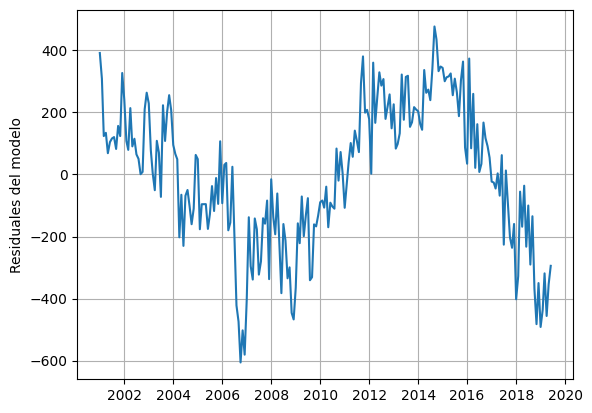

In [ ]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

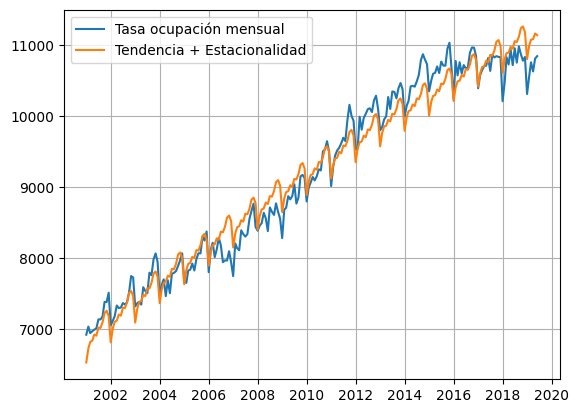

In [ ]:
plt.plot(y,label="Tasa ocupación mensual")
plt.plot(season_pol_2.fittedvalues,label="Tendencia + Estacionalidad")
plt.legend()
plt.grid()
plt.show()

In [ ]:
h=12
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2),axis=1),columns=["x","x2"] )

range_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True).astype(int) # Convert to int

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1))
X_for

,const,x,x2,2,3,4,5,6,7,8,9,10,11,12
0,1.0,223.0,49729.0,0,0,0,0,0,1,0,0,0,0,0
1,1.0,224.0,50176.0,0,0,0,0,0,0,1,0,0,0,0
2,1.0,225.0,50625.0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,226.0,51076.0,0,0,0,0,0,0,0,0,1,0,0
4,1.0,227.0,51529.0,0,0,0,0,0,0,0,0,0,1,0
5,1.0,228.0,51984.0,0,0,0,0,0,0,0,0,0,0,1
6,1.0,229.0,52441.0,0,0,0,0,0,0,0,0,0,0,0
7,1.0,230.0,52900.0,1,0,0,0,0,0,0,0,0,0,0
8,1.0,231.0,53361.0,0,1,0,0,0,0,0,0,0,0,0
9,1.0,232.0,53824.0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds_tendes = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds_tendes.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds_tendes.set_index(range_dates,inplace=True)
print(preds_tendes)

            Point_forecast      lower_95      upper_95
2019-07-01    11247.611440  10763.869333  11731.353547
2019-08-01    11234.988869  10750.954256  11719.023481
2019-09-01    11307.022964  10822.688332  11791.357595
2019-10-01    11429.648504  10945.006353  11914.290654
2019-11-01    11452.094877  10967.137722  11937.052032
2019-12-01    11371.404416  10886.124786  11856.684047
2020-01-01    10991.411804  10506.734445  11476.089163
2020-02-01    11179.683536  10694.665689  11664.701383
2020-03-01    11264.134689  10778.768088  11749.501289
2020-04-01    11272.196526  10786.472926  11757.920126
2020-05-01    11350.506258  10864.417430  11836.595086
2020-06-01    11325.726358  10839.264092  11812.188624


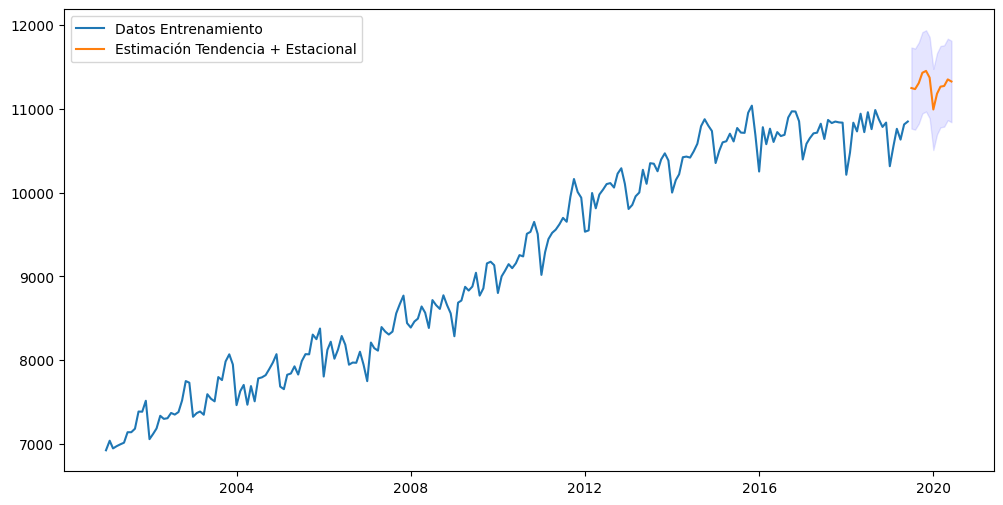

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds_tendes.index,preds_tendes['Point_forecast'],label="Estimación Tendencia + Estacional")
plt.fill_between(preds_tendes.index,preds_tendes['lower_95'], preds_tendes['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
rmse_tendes = np.sqrt(mean_squared_error(test_to,preds_tendes['Point_forecast']))
print(rmse_tendes)

538.8087741597217


## 9. Validación de supuestos de los residuales

In [ ]:
season_pol_2.resid.head(10)

,0
mes,
2001-01-01,391.366265
2001-02-01,308.594724
2001-03-01,123.728761
2001-04-01,134.131115
2001-05-01,68.562573
2001-06-01,104.338664
2001-07-01,115.986257
2001-08-01,120.442851
2001-09-01,82.208778


In [ ]:
season_pol_2.resid.tail(10)

,0
mes,
2018-09-01,-134.704128
2018-10-01,-368.374500
2018-11-01,-482.314705
2018-12-01,-349.980077
2019-01-01,-491.402296
2019-02-01,-436.649860
2019-03-01,-318.696845
2019-04-01,-455.961515
2019-05-01,-353.754079


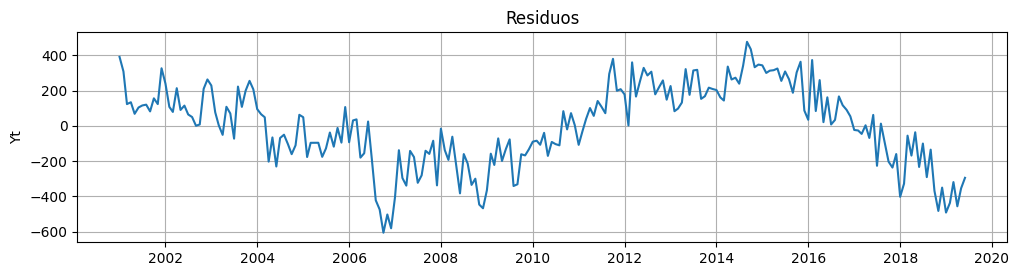

In [ ]:
# Graficando los residuos
fig = plt.figure(figsize=(12, 6))

plt.subplot(2,1, 1)
plt.title("Residuos")
plt.ylabel("Yt")
plt.plot(season_pol_2.resid)
plt.grid()

## Autocorrelación

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

𝐻0:ρ=0  (Es decir no hay autocorrelación)

𝐻1:ρ≠0  (Es decir hay autocorrelación)

Rechazo  𝐻0  cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un  α =0.05 ( α  = nivel de significancia).

In [ ]:
signo = season_pol_2.resid>0

In [ ]:
runstest_1samp(signo, correction=False)

(np.float64(-11.552802697479517), np.float64(7.145167988580092e-31))

El segundo valor corresponde al p-valor=7.145167988580092e-31, por lo tanto considerando un  α =0.05, los resultados obtenidos permiten rechazar la hipótesis nula, es decir, los residuos parece presentan autocorrelación.

In [ ]:
Resul_lb_bp = sm.stats.acorr_ljungbox(season_pol_2.resid, lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

,lb_stat,lb_pvalue,bp_stat,bp_pvalue,lb_ho,bp_ho
1,156.535880,6.464982e-36,154.439417,1.856521e-35,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
2,299.625352,8.653294e-66,294.973720,8.856671e-65,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
3,432.084767,2.481482e-93,424.476452,1.104069e-91,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
4,546.974803,4.617991e-117,536.289076,9.468743e-115,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
5,650.298901,2.728212e-138,636.384296,2.775553e-135,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
6,747.044127,4.239912e-158,729.674335,2.392105e-154,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
7,835.978106,3.188569e-176,815.035075,1.056423e-171,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
8,917.699737,8.584940e-193,893.108418,1.731264e-187,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
9,999.695796,2.005164e-209,971.077885,2.967508e-203,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
10,1075.458056,1.029271e-224,1042.781452,1.134136e-217,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr


## Homoscedasticidad y Heteroscedasticidad

𝐻0:  Comportamiento Homoscedastico (Es decir varianza constante)

𝐻1:  Comportamiento Heteroscedastico (Es decir varianza no constante)

Rechazo  𝐻0  cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un  α =0.05 ( α  = nivel de significancia).

In [ ]:
sm.stats.acorr_ljungbox((season_pol_2.resid-season_pol_2.resid.mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,90.693598,1.677351e-21,89.478952,3.099183e-21
2,143.989903,5.407416e-32,141.823537,1.597387e-31
3,182.362076,2.724883e-39,179.339188,1.225094e-38
4,195.780344,3.033832e-41,192.398038,1.617926e-40
5,202.564285,8.031625e-42,198.969981,4.717905e-41
6,205.999208,1.002107e-41,202.282228,6.199906e-41
7,206.814217,4.132256e-41,203.064492,2.574889e-40
8,207.504525,1.672720e-40,203.723982,1.048665e-39
9,208.380966,5.782222e-40,204.557384,3.668611e-39
10,208.613909,2.569923e-39,204.777847,1.625501e-38


Los resultados del la Tabla anterior, permiten rechazar la hipótesis nula, por tanto hay comportamiento Heterocedástico

## Normalidad

𝐻0: Normalidad

𝐻1: No normalidad

Rechazo 𝐻0 cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un α =0.05 ( α = nivel de significancia).

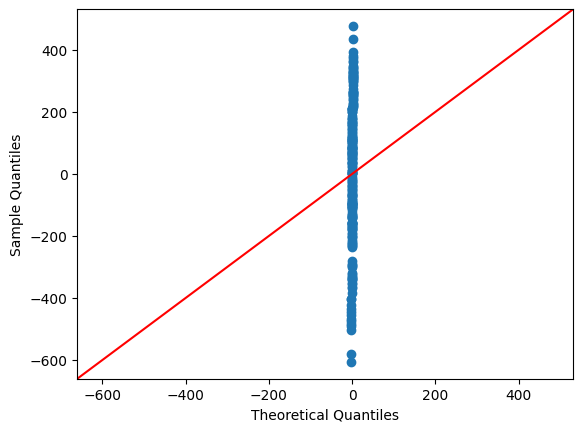

In [ ]:
sm.qqplot(season_pol_2.resid, line ='45')
py.show()

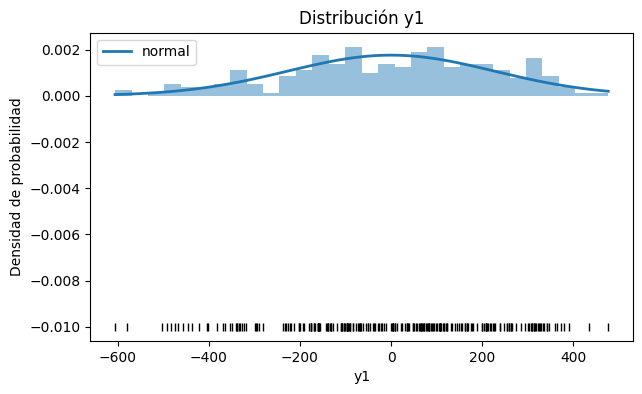

In [103]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(season_pol_2.resid)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(season_pol_2.resid), max(season_pol_2.resid), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=season_pol_2.resid, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(season_pol_2.resid, np.full_like(season_pol_2.resid, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución y1')
ax.set_xlabel('y1')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [ ]:
stats.shapiro(season_pol_2.resid)

ShapiroResult(statistic=np.float64(0.9823804448800506), pvalue=np.float64(0.0072221585051047785))

In [ ]:
stats.jarque_bera(season_pol_2.resid)

SignificanceResult(statistic=np.float64(6.062363741279992), pvalue=np.float64(0.04825856902270571))

Para ambas pruebas, se puede rechazar la hipótesis de que los datos provienen de una distribución normal.

### Conclusión final:

El modelo de tendencia + estacionalidad explica parte de la estructura, pero no captura completamente la dependencia temporal ni la varianza variable de los datos.
Por tanto, no es suficiente para pronósticos precisos a largo plazo.
El siguiente paso lógico sería probar modelos más robustos para series de tiempo, como:

ARIMA / SARIMA (para capturar autocorrelación y estacionalidad).

Prophet (más flexible para estacionalidad no lineal).

O incluso modelos de machine learning (como XGBoost o LSTM) si el objetivo es predecir.